In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
total_data = pd.read_csv("../data/total_data.csv")
total_busdata = pd.read_csv("../data/여진_total_busdata.csv")

total_data["총인구수"] = total_data["총인구수"].apply(lambda x: int(x.replace(",", "")))
total_data["노인(수)"] = total_data["노인(수)"].apply(lambda x: int(x.replace(",", "")))
total_data["인구_대비_정류장수"] = total_data["총인구수"] / total_data["노선정류장수"]
total_data["노인(수)^2"] = total_data["노인(수)"]**2
use_col = ['usage', '노선정류장수', '총인구수', '노인(수)', '인구_대비_정류장수'] # , '노선거리(km)', '굴곡도'

In [3]:
total_data

,city_name,usage,노선정류장수,노선거리(km),굴곡도,총인구수,노인(수),인구_대비_정류장수,노인(수)^2
0,창원시,33931.0,105,55.900000,2.0,1003731,276574,9559.342857,76493177476
1,창원시,2558.0,83,53.500000,1.7,1003731,276574,12093.144578,76493177476
2,창원시,299.0,74,43.800000,2.6,1003731,276574,13563.932432,76493177476
3,창원시,63612.0,35,21.100000,1.0,1003731,276574,28678.028571,76493177476
4,창원시,68306.0,39,8.800000,1.8,1003731,276574,25736.692308,76493177476
...,...,...,...,...,...,...,...,...,...
2508,합천군,NaN,27,29.863889,2.0,40756,23160,1509.481481,536385600
2509,합천군,NaN,27,29.863889,2.0,40756,23160,1509.481481,536385600
2510,합천군,45.0,29,25.300000,1.3,40756,23160,1405.379310,536385600
2511,합천군,NaN,27,29.863889,2.0,40756,23160,1509.481481,536385600


In [153]:
total_data[use_col].corr()

,usage,노선정류장수,총인구수,노인(수),인구_대비_정류장수
usage,1.000000,0.370502,0.399047,0.389275,0.043769
노선정류장수,0.370502,1.000000,0.579305,0.573441,-0.048908
총인구수,0.399047,0.579305,1.000000,0.990646,0.402394
노인(수),0.389275,0.573441,0.990646,1.000000,0.396673
인구_대비_정류장수,0.043769,-0.048908,0.402394,0.396673,1.000000


In [154]:
impute_total_data = pd.DataFrame(IterativeImputer(random_state=0).fit_transform(total_data[use_col]))
impute_total_data.columns = use_col
impute_total_data["usage"] = impute_total_data["usage"].round(0)

In [155]:
total_data[use_col] = impute_total_data

In [156]:
total_busdata[use_col] = impute_total_data

In [159]:
total_busdata.isna().sum()

city_name               0
routeno                 0
routetp                 0
startnodenm             0
endnodenm               0
startvehicletime        0
endvehicletime          0
intervaltime            0
intervalsattime         0
intervalsuntime         0
usage                   0
노선정류장수                  0
노선거리(km)                0
굴곡도                     0
start                   0
end                     0
total_operating_time    0
interval_avg            0
num_bus                 0
총인구수                    0
노인(수)                   0
인구_대비_정류장수              0
dtype: int64

In [158]:
total_busdata.to_csv("../data/weight_data.csv", index=False)

In [78]:
# def imputer_validate_processor(
#     train_set,
#     valid_set, 
#     y_name = "usage"
#     ):
        
#     y_valid_true = valid_set[y_name]
#     valid_set["usage"] = np.array(np.nan)

#     imputer = IterativeImputer(random_state=0)
#     imputer.fit(train_set)
#     imputer_valid_set = pd.DataFrame(imputer.transform(valid_set))

#     imputer_valid_set.columns = valid_set.columns
#     imputer_valid_set["usage"] = imputer_valid_set["usage"].round(0)

#     return {"y_valid_true" : y_valid_true, 
#             "y_valid_pred" : imputer_valid_set["usage"], 
#             "rmse" : mean_squared_error(y_valid_true, imputer_valid_set["usage"], squared=False)}
    

In [79]:
# data_train = data[~data.isna()]
# data_test = data[data.isna()]

# train_set, valid_set = train_test_split(
#     data_train, 
#     test_size=0.2, 
#     random_state=0
#     )

In [80]:
# result = imputer_validate_processor(train_set, valid_set)

In [81]:
# result

{'y_valid_true': 706     294.0
 715     531.0
 739     959.0
 708     607.0
 691    2074.0
 682    1085.0
 714     293.0
 738    1573.0
 720      83.0
 702    4323.0
 684    2309.0
 690     831.0
 Name: usage, dtype: float64,
 'y_valid_pred': 0      891.0
 1     1455.0
 2      232.0
 3     1333.0
 4     2472.0
 5     1425.0
 6     1077.0
 7      171.0
 8      299.0
 9      295.0
 10    3472.0
 11    1696.0
 Name: usage, dtype: float64,
 'rmse': np.float64(1399.1749950119415)}

In [65]:
# imputer = IterativeImputer(random_state=0)
# imputer.fit(sc)
# sc_valid_imputer = pd.DataFrame(imputer.transform(sc_valid_))

# sc_valid_imputer.columns = sc_valid_.columns
# # sc_valid_imputer["usage"] = sc_valid_imputer["usage"].round(0)

In [66]:
# sc_valid_y

706     294.0
715     531.0
739     959.0
708     607.0
691    2074.0
682    1085.0
714     293.0
738    1573.0
720      83.0
702    4323.0
684    2309.0
690     831.0
Name: usage, dtype: float64

In [67]:
# sc_valid_imputer["usage"]

0      963.077985
1     1384.559244
2      416.576267
3     1322.139555
4     2248.871201
5     1410.975637
6     1088.758209
7      366.226634
8      435.186376
9      453.525448
10    3056.147797
11    1621.298812
Name: usage, dtype: float64

In [68]:
# mean_squared_error(sc_valid_y, sc_valid_imputer["usage"], squared=False)

np.float64(1306.6471263956723)

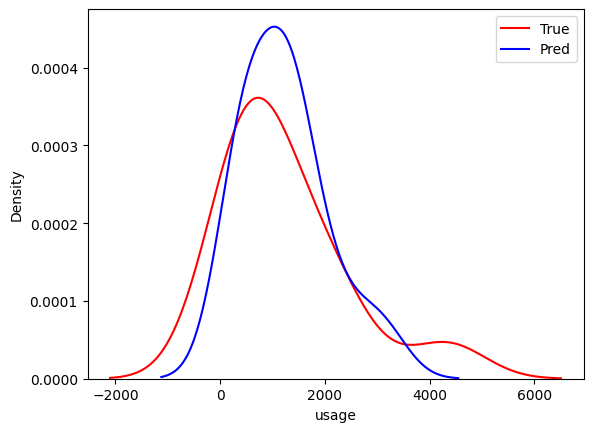

In [69]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.kdeplot(sc_valid_y, color="r", label="True")
# sns.kdeplot(sc_valid_imputer["usage"], color="b", label="Pred")
# plt.legend()